In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the necesary modules that I will require for this project

In [ ]:
df = pd.read_csv("churndata.csv")
# Loading the data to properly analyze and create a model.

In [ ]:
# Exploratory Data Analysis
# its  for understanding the data before building a model.
# Discover pattern, detect anomalies
# Understand relationships
# Check assumptions and identify data problems
# Without this my model may overfit, learn noise, be biased, use leakage and fail in real world use
df.head()
# This just shows the top 5 rows of data, shows perfect data loading and shows whether it is structured or not
# Helps understand column types and detect data issues as well

,Unnamed: 0,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,0,8779-QRDMV,1,NaN,No,No,DSL,8,No,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


The churn value is binary perfect for classification. Monthly and Total revenue are present for predicting churn. Ids are present which are useless.

This data has unnamed indexing column. Total of 22 columns.

In [ ]:
df.shape
# Learning the shape that is number of rows and columns
# Helps know the dataset size, dataset size directs the process
# Helps to understand the data loss as well after dropping


(7043, 22)

The data size is good for ML. It has managable 22 features.

In [ ]:
df.info()

# Summarizes the dataset structure
# Acts as the health report of the dataset
# Helps detect missing values, check data types, understand feature categories vs numeric
# Shows memory usage which shows improtance when working with large dataset
# Can be used to check the data after the cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7043 non-null   int64  
 1   id             7043 non-null   object 
 2   months         7043 non-null   int64  
 3   offer          3166 non-null   object 
 4   phone          7043 non-null   object 
 5   multiple       7043 non-null   object 
 6   internet_type  5517 non-null   object 
 7   gb_mon         7043 non-null   int64  
 8   security       7043 non-null   object 
 9   backup         7043 non-null   object 
 10  protection     7043 non-null   object 
 11  support        7043 non-null   object 
 12  unlimited      7043 non-null   object 
 13  contract       7043 non-null   object 
 14  paperless      7043 non-null   object 
 15  payment        7043 non-null   object 
 16  monthly        7043 non-null   float64
 17  total_revenue  7043 non-null   float64
 18  satisfac

There are no columns with missing data except that of offer and internet_type. Its mostly because not everyone recieve offers and the null values in the internet_type must be customers without internet service. Missing values carry importance so should be filled as "No Offer" and "No Internet" instead of dropping rows. It has 9 numerical data and 13 categorical data.

In [ ]:
df.describe()

# This provides the statistical sumamry of numerical features of the data
# Helps understand the dataset distribution, detect outliers quickly
# Check data scale before modeling
# Spot data errors

,Unnamed: 0,months,gb_mon,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.386767,20.515405,64.761692,3034.379056,3.244924,0.265370,58.505040,4400.295755
std,2033.283305,24.542061,20.418940,30.090047,2865.204542,1.201657,0.441561,21.170031,1183.057152
min,0.000000,1.000000,0.000000,18.250000,21.360000,1.000000,0.000000,5.000000,2003.000000
25%,1760.500000,9.000000,3.000000,35.500000,605.610000,3.000000,0.000000,40.000000,3469.000000
50%,3521.000000,29.000000,17.000000,70.350000,2108.640000,3.000000,0.000000,61.000000,4527.000000
75%,5281.500000,55.000000,27.000000,89.850000,4801.145000,4.000000,1.000000,75.500000,5380.500000
max,7042.000000,72.000000,85.000000,118.750000,11979.340000,5.000000,1.000000,96.000000,6500.000000


From tenure we can understand that average customer has been with the company for like 32 months. 25 percent of customers stayed for like 9 months. This typically means that early customers are more likely to churn so they should be given more importance.

Most customers use less than 27 gbs per month. That means that most of the customers are light to moderate users while the other users use upto 85 gbs per months and must be premium subscribers.

Most of the users pay between 18.25 to 118.75 dollars per month with average upto 70.35 dollars. Mostly the mid range plans are more common. The monthly price increment may cause higher churn risk due to price sensitivity.

Total revenue ranges from 21.36 dollars to 11979.34 dollars. High spending customers are more spending upto 4801.14 dollars and are more loyal and long term.

Customer satisfaction ranges from 1 to 5 with most of them rating 3 to 4. The low satisfaction customers that is 1 to 2 are more likely to leave.

Around 26.5 percent of customers have churned meaning 1 in every 4 customers leave.

Churn score ranges from 5 to 96.5 with an averafe of 58.5. While this indicates predicted churn risk. This must not be used as a feature in predictive model to avoid data leakage.

CLTV ranges from $2,003 to $6,500, with a median of $4,527. Customers with higher lifetime value are more loyal and represent the most critical segment to retain.



In [ ]:
df.isnull().sum()

# This is to find the total number of null values of each column.
# This indicates that offer and internet type are the ones having more.
# Needs clear inspection because those null values can mean information.

,0
Unnamed: 0,0
id,0
months,0
offer,3877
phone,0
multiple,0
internet_type,1526
gb_mon,0
security,0
backup,0


In [ ]:
df["offer"].head()

,offer
0,NaN
1,Offer E
2,Offer D
3,Offer C
4,Offer C


Checking what null values in the column offer and internet_type could look like.

In [ ]:
df["internet_type"].sample(5)
# From this I found that the NaN were mainly the people who didn't got offer and
# for internet_type its people without the internet


,internet_type
4613,Cable
686,Fiber Optic
6449,Fiber Optic
2003,Fiber Optic
1692,DSL


In [ ]:
df["offer"].isnull().sum()

np.int64(3877)

In [ ]:
df["offer"].value_counts().sum()

np.int64(3166)

In [ ]:
df["offer"] = df["offer"].fillna("No Offer")
# Filling it in with No Offer because thats an information

In [ ]:
df[df["offer"] == "No Offer"][[ "monthly", "total_revenue"]].describe()

#  This shows the statistical summary of the people monthly and total revenue.
# Simply seperates the monthly and total revenue data who has no offer.


,monthly,total_revenue
count,3877.000000,3877.000000
mean,64.355791,2926.847702
std,29.979067,2783.625844
min,18.750000,21.400000
25%,35.200000,583.650000
50%,70.200000,2069.570000
75%,89.600000,4534.000000
max,118.750000,11688.900000


In [ ]:
df.groupby("offer")["churn_value"].mean()

# This groups the data based on the offer types and calculates the mean of those churn values of the specific offer type
# Those with higher mean are more likely to churn.

,churn_value
offer,
No Offer,0.271086
Offer A,0.067308
Offer B,0.122573
Offer C,0.228916
Offer D,0.267442
Offer E,0.529193


From the above observation we found that about 52.91 percent of people with Offer E have churned. And descends down till offer A. So offer too has great infulence in the risk of churn. Therefore Offer A seems the safest in terms of churn.Customers with Offer E are roughly 8 times more likely to churn than those with Offer A.

In [ ]:
df["internet_type"].isnull().sum()
# Summing the counts of data with No internet type

np.int64(1526)

In [ ]:
df["internet_type"].value_counts()
# Counting the counts of people based on Internet types
# Most people uses the Fiber Optic and then DSL followed by cable at last.

,count
internet_type,
Fiber Optic,3035
DSL,1652
Cable,830


In [ ]:
df["internet_type"] = df["internet_type"].fillna("Missing")

# This fills out the data with no Internet type as Missing

In [ ]:
df.groupby("internet_type")["churn_value"].mean()
# This groups the data based on internet type and gives the mean of their churn value

,churn_value
internet_type,
Cable,0.256627
DSL,0.185835
Fiber Optic,0.407249
Missing,0.074050


From the above stats, it shows that internet type has a great influence in churn. The churn rate for the Fiber Optic is the highest with 40.72 percent. Similarly for cable type its 25.6 percent and 18.58 for DSL. Customers with missing type has the lowest churn rate.

In [ ]:
missing_internet = df[df["internet_type"] == "Missing"]
# This filters the original DataFrame and creates a new DataFrame containing only the rows where internet_type is missing (NaN).

In [ ]:
missing_internet.shape
# This gives the number of rows and columns of the data with missing internet


(1526, 22)

In [ ]:
missing_internet["gb_mon"].describe()
# Calculating the statistical summarry of internet usage of those with missing Internet Type
# Every statistical summary says 0 which indicates zero data usage
# Hence proved that missing internet simply means no internet use.

,gb_mon
count,1526.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Customers with missing internet_type have 0 internet usage, suggesting that internet service were not applicable for these customers.

In [ ]:
missing_internet.shape

(1526, 22)

In [ ]:
missing_internet[["security","backup","protection","support","unlimited"]].value_counts()

# Calculating the count of elements of different columns where we found out that this had nothing that is no data

,,,,,count
security,backup,protection,support,unlimited,
No,No,No,No,No,1526


In [ ]:
no_internet_condition = (
    (df["internet_type"] == "Missing") &
    (df["security"] == "No") &
    (df["backup"] == "No") &
    (df["protection"] == "No") &
    (df["support"] == "No")&
    (df["unlimited"] == "No")
)

df.loc[no_internet_condition, "internet_type"] = "No Internet"

# The above code locates the collection that meets the above requirements and changes that row.
# .loc is used instead of df["internet_type"] because .loc only accesses the required rows meeting the requirements

In [ ]:
df["internet_type"].value_counts(dropna=False)
# This is the new categories within the internet_type where No internet is also included.

,count
internet_type,
Fiber Optic,3035
DSL,1652
No Internet,1526
Cable,830


In [ ]:
df.groupby("internet_type")["churn_value"].mean()

# Now the churn value of the given internet type are

,churn_value
internet_type,
Cable,0.256627
DSL,0.185835
Fiber Optic,0.407249
No Internet,0.074050


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7043 non-null   int64  
 1   id             7043 non-null   object 
 2   months         7043 non-null   int64  
 3   offer          7043 non-null   object 
 4   phone          7043 non-null   object 
 5   multiple       7043 non-null   object 
 6   internet_type  7043 non-null   object 
 7   gb_mon         7043 non-null   int64  
 8   security       7043 non-null   object 
 9   backup         7043 non-null   object 
 10  protection     7043 non-null   object 
 11  support        7043 non-null   object 
 12  unlimited      7043 non-null   object 
 13  contract       7043 non-null   object 
 14  paperless      7043 non-null   object 
 15  payment        7043 non-null   object 
 16  monthly        7043 non-null   float64
 17  total_revenue  7043 non-null   float64
 18  satisfac

In [ ]:
df["churn_score"].sample(5)

,churn_score
6275,52
4205,50
2401,84
7005,78
1890,90


The churn_score column does not represent actual customer behavior, and the values suggest it was generated by a predictive model rather than recorded during data entry. Including it in our dataset would cause data leakage, as it already encodes information about the target (churn_value). Therefore, we are dropping this column to ensure the integrity of our analysis and modeling.


In [ ]:
df = df.drop(columns=["Unnamed: 0", "id","phone","churn_score"])


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   months         7043 non-null   int64  
 1   offer          7043 non-null   object 
 2   multiple       7043 non-null   object 
 3   internet_type  7043 non-null   object 
 4   gb_mon         7043 non-null   int64  
 5   security       7043 non-null   object 
 6   backup         7043 non-null   object 
 7   protection     7043 non-null   object 
 8   support        7043 non-null   object 
 9   unlimited      7043 non-null   object 
 10  contract       7043 non-null   object 
 11  paperless      7043 non-null   object 
 12  payment        7043 non-null   object 
 13  monthly        7043 non-null   float64
 14  total_revenue  7043 non-null   float64
 15  satisfaction   7043 non-null   int64  
 16  churn_value    7043 non-null   int64  
 17  cltv           7043 non-null   int64  
dtypes: float

In [ ]:
numeric_cols = ["months", "monthly", "total_revenue","cltv"]

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers  = df[(df[col] <lower_bound) | (df[col] > upper_bound)]
  print(f"{col}: Outliers count = {len(outliers)} | Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")

months: Outliers count = 0 | Lower = -60.00, Upper = 124.00
monthly: Outliers count = 0 | Lower = -46.02, Upper = 171.38
total_revenue: Outliers count = 21 | Lower = -5687.69, Upper = 11094.45
cltv: Outliers count = 0 | Lower = 601.75, Upper = 8247.75


Outliers prediction is important becuase it can mislead mean, standard deviation  or correlation. It also improves the model performance as many models assume data follows a certain pattern. Outliers are also error in data entry, measurement mistakes or sensor glitches. Not all outliers are bad they can indicate rare and important cases as well.
From the above data, we can see no outliers in months, monthly and cltv. There is about 21 outliers above 11094.45 because min for this column is 21.36.

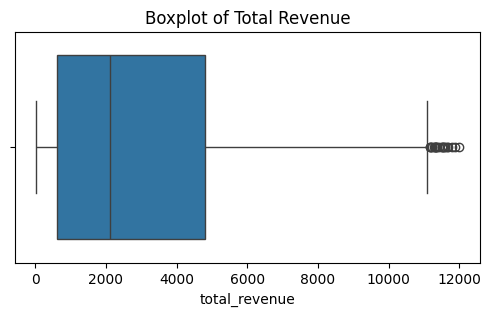

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["total_revenue"])
plt.title("Boxplot of Total Revenue")
plt.show()

The box plot shows that total revenue is highly right-skewed. There are several points beyond the upper whisker, which are marked as outliers. These represent customers with very high lifetime revenue. Since they appear only on the higher end, they are likely premium or long-term customers rather than data errors.

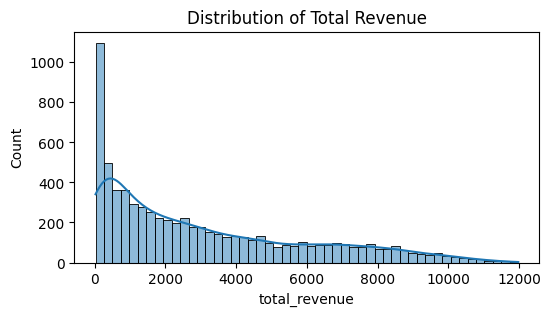

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(df["total_revenue"], bins=50, kde=True)
plt.title("Distribution of Total Revenue")
plt.show()

The histogram shows that most customers have low to moderate total revenue, while a small number of customers generate very high revenue. The long right tail indicates a right-skewed distribution. This pattern is common in customer revenue data and suggests the presence of high-value customers.

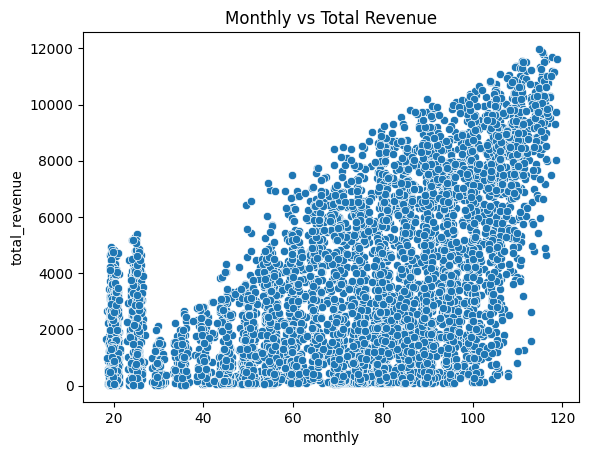

In [ ]:
sns.scatterplot(x=df["monthly"], y=df["total_revenue"])
plt.title("Monthly vs Total Revenue")
plt.show()

The scatter plot shows a clear positive relationship between monthly charges and total revenue. Customers with higher monthly charges generally have higher total revenue. The extreme values follow this trend, which indicates that they are valid premium customers and not mistakes.

Since the outliers reflect genuine high-value customers and follow a clear trend, no changes are made to them.

In [ ]:
categorical_cols = ["offer", "multiple", "internet_type", "security", "backup", "protection","support","unlimited","contract","paperless","payment"]

In [ ]:
df_encoded = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
print(df_encoded.head())
print("Total columns after encoding:",df_encoded.shape[1])

   months  gb_mon  monthly  total_revenue  satisfaction  churn_value  cltv  \
0       1       8    39.65          59.65             3            1  5433   
1       8      17    80.65        1024.10             3            1  5302   
2      18      52    95.45        1910.88             2            1  3179   
3      25      12    98.50        2995.07             2            1  5337   
4      37      14    76.50        3102.36             2            1  2793   

   offer_Offer A  offer_Offer B  offer_Offer C  ...  security_Yes  backup_Yes  \
0          False          False          False  ...         False       False   
1          False          False          False  ...         False        True   
2          False          False          False  ...         False       False   
3          False          False           True  ...         False        True   
4          False          False           True  ...         False       False   

   protection_Yes  support_Yes  unlimited_Ye

In [ ]:
print(df_encoded.filter(like="offer_").head())

print(df_encoded.dtypes[df_encoded.dtypes == "object"])

   offer_Offer A  offer_Offer B  offer_Offer C  offer_Offer D  offer_Offer E
0          False          False          False          False          False
1          False          False          False          False           True
2          False          False          False           True          False
3          False          False           True          False          False
4          False          False           True          False          False
Series([], dtype: object)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ["months", "gb_mon", "monthly","total_revenue","satisfaction","cltv"]

In [ ]:
scalar = StandardScaler()
df_encoded[numeric_cols] = scalar.fit_transform(df_encoded[numeric_cols])
df_encoded[numeric_cols].head()

,months,gb_mon,monthly,total_revenue,satisfaction,cltv
0,-1.278988,-0.612975,-0.834611,-1.038299,-0.203836,0.872974
1,-0.993743,-0.172176,0.528063,-0.701668,-0.203836,0.762236
2,-0.586250,1.542040,1.019955,-0.392146,-1.036080,-1.032395
3,-0.301005,-0.417064,1.121324,-0.013720,-1.036080,0.791822
4,0.187986,-0.319109,0.390134,0.023728,-1.036080,-1.358692


In [ ]:
services = ["security","backup","protection","support","unlimited"]
df[services] = df[services].replace({"Yes": 1, "No": 0})
df["total_services"] = df[services].sum(axis=1)
print(df[["security","backup","protection","support","unlimited","total_services"]].head())

   security  backup  protection  support  unlimited  total_services
0         0       0           1        0          0               1
1         0       1           0        0          1               2
2         0       0           0        0          1               1
3         0       1           1        0          1               3
4         0       0           0        0          1               1


/tmp/ipython-input-2208184377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[services] = df[services].replace({"Yes": 1, "No": 0})


In [ ]:
df["total_services"].sample(5)

,total_services
2810,2
4433,2
216,2
2401,3
4709,4


In [ ]:
df["avg_monthly_revenue"] = df["total_revenue"] / (df["months"] + 1e-5)

In [ ]:
df["tenure_group"] = pd.cut(df["months"], bins = [0,6,24,100], labels = ["short","medium","long"])

In [ ]:
df['high_risk'] = ((df['satisfaction'] < 3)).astype(int)

In [ ]:
df["tenure_group"].sample(5)

,tenure_group
6843,long
3685,long
1139,long
1227,medium
6955,long


In [ ]:
tenure_dummies = pd.get_dummies(df['tenure_group'], prefix='tenure_group', drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   months               7043 non-null   int64   
 1   offer                7043 non-null   object  
 2   multiple             7043 non-null   object  
 3   internet_type        7043 non-null   object  
 4   gb_mon               7043 non-null   int64   
 5   security             7043 non-null   int64   
 6   backup               7043 non-null   int64   
 7   protection           7043 non-null   int64   
 8   support              7043 non-null   int64   
 9   unlimited            7043 non-null   int64   
 10  contract             7043 non-null   object  
 11  paperless            7043 non-null   object  
 12  payment              7043 non-null   object  
 13  monthly              7043 non-null   float64 
 14  total_revenue        7043 non-null   float64 
 15  satisfaction         

In [ ]:
# tenure_dummies = tenure_dummies.astype(int)

In [ ]:
df_encoded = pd.concat([df_encoded, tenure_dummies], axis=1)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   gb_mon                     7043 non-null   float64
 2   monthly                    7043 non-null   float64
 3   total_revenue              7043 non-null   float64
 4   satisfaction               7043 non-null   float64
 5   churn_value                7043 non-null   int64  
 6   cltv                       7043 non-null   float64
 7   offer_Offer A              7043 non-null   bool   
 8   offer_Offer B              7043 non-null   bool   
 9   offer_Offer C              7043 non-null   bool   
 10  offer_Offer D              7043 non-null   bool   
 11  offer_Offer E              7043 non-null   bool   
 12  multiple_Yes               7043 non-null   bool   
 13  internet_type_DSL          7043 non-null   bool 

In [ ]:
#EDA

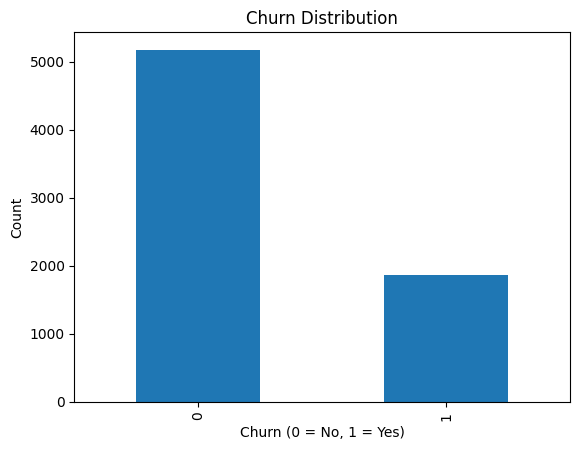

In [ ]:
df_encoded["churn_value"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Used df_encoded because this is the model ready dataframe for now


From the above figure, we can visualize that the class is imbalanced. There are like 2 times more non churners than churners. Since the data is imbalanced the standard model will struggle to correctly predict the "Yes".It would be easy for model to acheive more than 70 percent accuracy by just guessing "No" everytime.

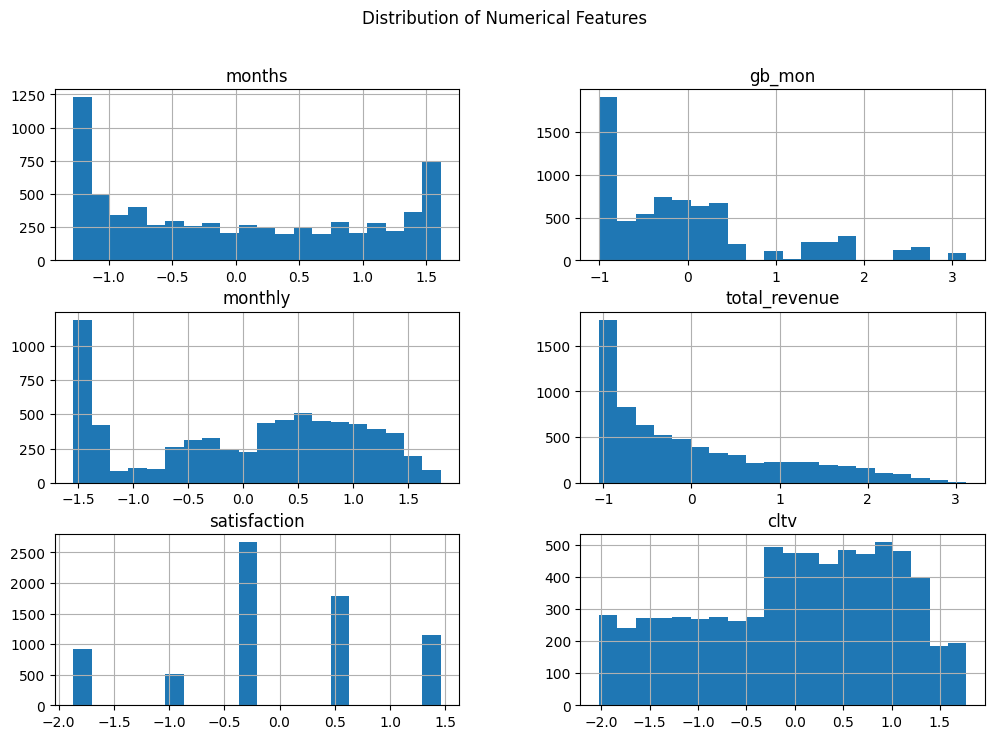

In [ ]:
num_cols = ["months", "gb_mon","monthly","total_revenue","satisfaction","cltv"]
df_encoded[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

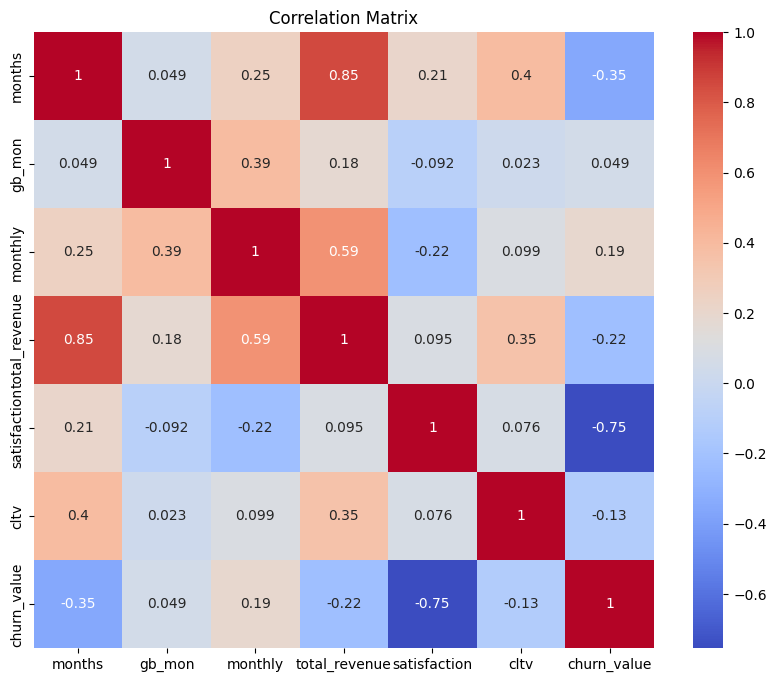

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[num_cols + ["churn_value"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

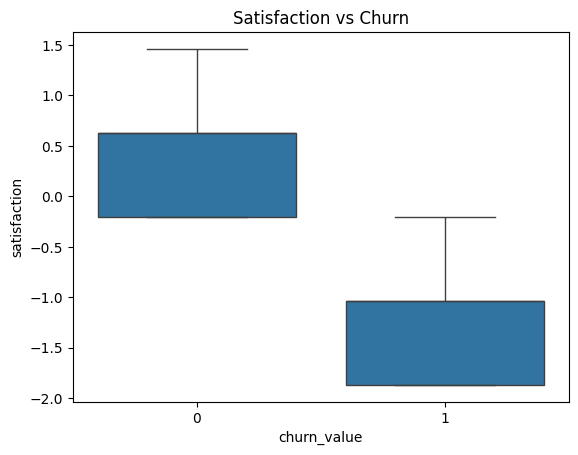

In [ ]:
sns.boxplot(x="churn_value",y="satisfaction",data=df_encoded)
plt.title("Satisfaction vs Churn")
plt.show()

In [ ]:
tenure_cols = ["tenure_group_medium","tenure_group_long"]
df_encoded.groupby(tenure_cols)["churn_value"].mean()

tenure_group_medium  tenure_group_long
False                False                0.533333
                     True                 0.140360
True                 False                0.314368
Name: churn_value, dtype: float64

From the above data we can see that the short-term customers are more likely to leave. Mediu tenure customers are less likely and the long tenure customers are the least likely to leave.

In [ ]:
service_cols = ["security_Yes","backup_Yes","protection_Yes","support_Yes","unlimited_Yes"]
churn_by_service = df_encoded[service_cols + ["churn_value"]].groupby("churn_value").mean()
print(churn_by_service)

             security_Yes  backup_Yes  protection_Yes  support_Yes  \
churn_value                                                          
0                0.333204    0.368380        0.362775     0.335137   
1                0.157838    0.279829        0.291600     0.165864   

             unlimited_Yes  
churn_value                 
0                 0.626788  
1                 0.803638  


From the above data we can see that the churned customers tend to have fewer services like security, backup, protection and support. But the unlimited plans shows the opposite pattern. Higher percentaage of churners have unlimited features. This could indicate that the customers with unlimited plans still leave.

In [ ]:
# Correlation with target
churn_corr = df_encoded.corr()["churn_value"].sort_values(ascending=False)
churn_corr

,churn_value
churn_value,1.000000
internet_type_Fiber Optic,0.279623
offer_Offer E,0.214648
monthly,0.193356
paperless_Yes,0.191825
unlimited_Yes,0.166545
tenure_group_medium,0.063567
payment_Mailed Check,0.056348
gb_mon,0.048868
multiple_Yes,0.040102


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("churn_value", axis=1)
y = df_encoded["churn_value"]

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X, y)

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(15)

,0
satisfaction,0.547857
months,0.068112
monthly,0.058533
total_revenue,0.058109
cltv,0.039328
gb_mon,0.036094
contract_Two Year,0.034152
internet_type_Fiber Optic,0.021067
tenure_group_long,0.018329
contract_One Year,0.015374


Fromn the above findings we knew that satisfaction is the most critical feature. Feature like months, contract , total_revenue also matter but Random Forest shows their relative contribution to be smaller. Some features with small correaltion can still help the model due to non linear interactions. Random Forest importance is more reliable compared to correlation alone for model building.

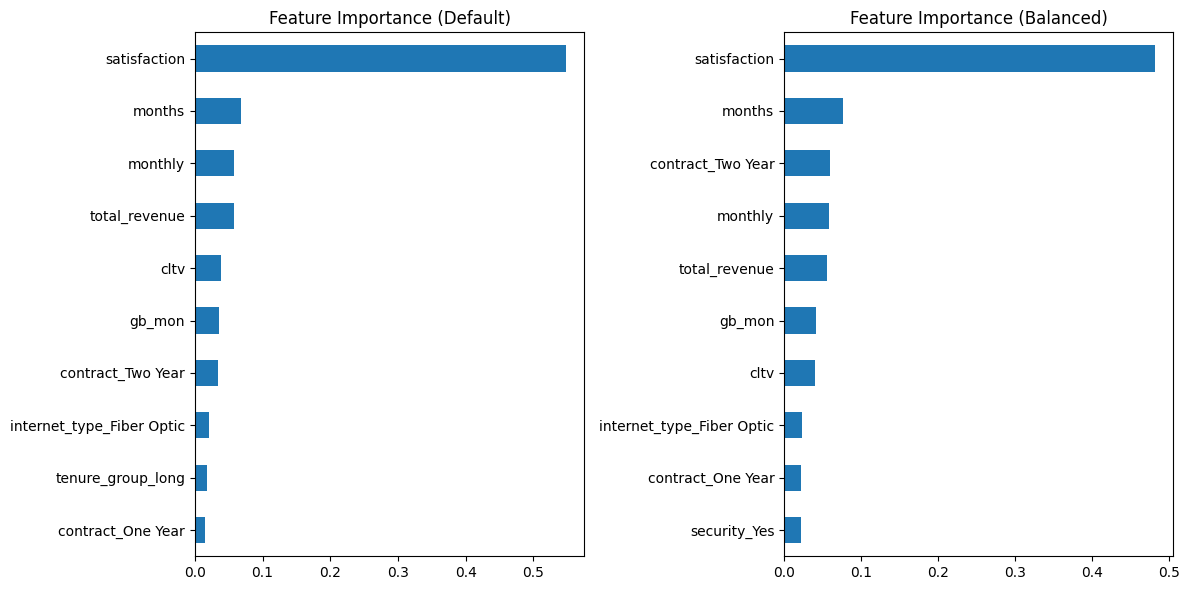

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Features and target
X = df_encoded.drop("churn_value", axis=1)
y = df_encoded["churn_value"]

# Random Forest WITHOUT class_weight
rf_default = RandomForestClassifier(n_estimators=200, random_state=42)
rf_default.fit(X, y)
feat_imp_default = pd.Series(rf_default.feature_importances_, index=X.columns).sort_values(ascending=False)

# Random Forest WITH class_weight='balanced'
rf_balanced = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_balanced.fit(X, y)
feat_imp_balanced = pd.Series(rf_balanced.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
feat_imp_default.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Default)")

plt.subplot(1,2,2)
feat_imp_balanced.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importance (Balanced)")

plt.tight_layout()
plt.show()

In [ ]:
feat_imp_balanced_sorted = feat_imp_balanced.sort_values(ascending=False)
print(feat_imp_balanced_sorted)

satisfaction                 0.481120
months                       0.076904
contract_Two Year            0.059630
monthly                      0.057770
total_revenue                0.055381
gb_mon                       0.041843
cltv                         0.039589
internet_type_Fiber Optic    0.022946
contract_One Year            0.022320
security_Yes                 0.022302
tenure_group_long            0.021838
payment_Credit Card          0.014563
internet_type_No Internet    0.013915
support_Yes                  0.011189
paperless_Yes                0.009288
multiple_Yes                 0.006784
unlimited_Yes                0.006048
backup_Yes                   0.005666
internet_type_DSL            0.005601
offer_Offer E                0.004874
protection_Yes               0.004818
tenure_group_medium          0.004560
payment_Mailed Check         0.002663
offer_Offer D                0.002504
offer_Offer B                0.002501
offer_Offer C                0.002033
offer_Offer 

In [ ]:
top_features = feat_imp_balanced_sorted.head(10).index  # top 10 features

In [ ]:
X_selected = X[top_features]
# Print this to see the exact order the model expects

In [ ]:
print("--- EXACT FEATURE ORDER ---")
print(list(X_selected.columns))

--- EXACT FEATURE ORDER ---
['satisfaction', 'months', 'contract_Two Year', 'monthly', 'total_revenue', 'gb_mon', 'cltv', 'internet_type_Fiber Optic', 'contract_One Year', 'security_Yes']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # helps with churn imbalance
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9488999290276792
F1-score: 0.8980169971671388
ROC-AUC: 0.9859645043788267
Confusion Matrix:
 [[1020   15]
 [  57  317]]


In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# 5-fold cross-validation using ROC-AUC
cv_scores = cross_val_score(rf_model, X_selected, y, cv=5, scoring='roc_auc')
print("CV ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

CV ROC-AUC scores: [0.98857759 0.98513266 0.9823594  0.98121878 0.98349587]
Mean CV ROC-AUC: 0.9841568596722278


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_selected, y)
print("Best parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV ROC-AUC: 0.9874722347274766


In [ ]:
rf_final = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
rf_final.fit(X_selected, y)  # or X_train, y_train if using train/test split

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, n_estimators=200, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Train final model on training set
rf_final.fit(X_train, y_train)

# Predictions
y_pred = rf_final.predict(X_test)
y_pred_prob = rf_final.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9474804826117814
F1-score: 0.9002695417789758
ROC-AUC: 0.9876256167816271
Confusion Matrix:
 [[1001   34]
 [  40  334]]


satisfaction                 0.629432
contract_Two Year            0.082258
months                       0.063575
total_revenue                0.045734
monthly                      0.039058
internet_type_Fiber Optic    0.033386
gb_mon                       0.032390
security_Yes                 0.029295
contract_One Year            0.028307
cltv                         0.016566
dtype: float64


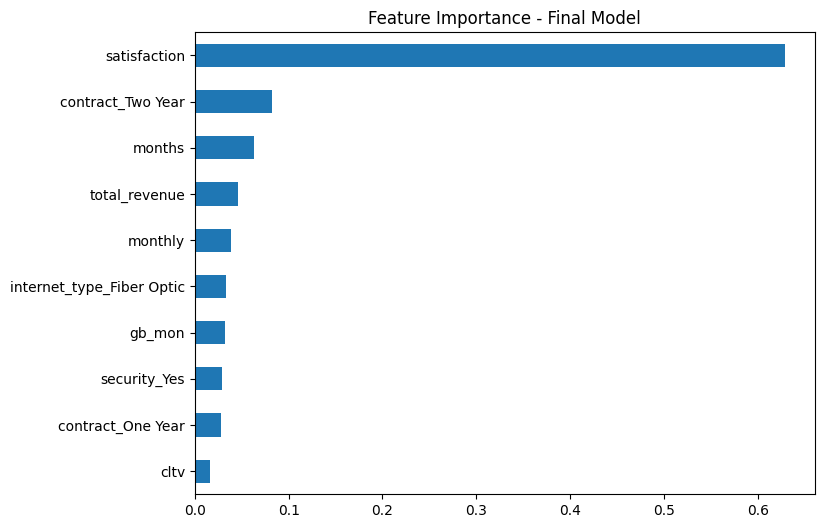

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp_final = pd.Series(rf_final.feature_importances_, index=X_selected.columns).sort_values(ascending=False)
print(feat_imp_final)

# Plot top 10 features
plt.figure(figsize=(8,6))
feat_imp_final.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importance - Final Model")
plt.show()

In [ ]:
import joblib
joblib.dump(rf_final, "churn_model.pkl")

['churn_model.pkl']

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# 1. Load your saved model (Ensure churn_model.pkl is in the same folder)
try:
    model = joblib.load('churn_model.pkl')
except FileNotFoundError:
    st.error("Model file 'churn_model.pkl' not found. Please place it in the project folder.")

st.title("📊 Customer Churn Prediction")
st.write("Adjust the details below to predict if a customer is likely to churn.")

# 2. Create Input Widgets for all 10 features used in the notebook
# Using columns to organize the layout
col1, col2 = st.columns(2)

with col1:
    st.subheader("Customer Metrics")
    satisfaction = st.slider("Satisfaction Score (1-5)", 1, 5, 3)
    months = st.number_input("Tenure (Months)", min_value=1, max_value=72, value=12)
    cltv = st.number_input("Customer Lifetime Value (CLTV)", value=4000)
    gb_mon = st.number_input("Monthly Data Usage (GB)", min_value=0, value=20)

with col2:
    st.subheader("Contract & Service")
    monthly = st.number_input("Monthly Charges ($)", min_value=0.0, value=70.0)
    total_revenue = st.number_input("Total Revenue ($)", min_value=0.0, value=1000.0)
    contract = st.selectbox("Contract Type", ["Month-to-Month", "One Year", "Two Year"])
    internet = st.selectbox("Internet Type", ["Fiber Optic", "DSL", "Cable", "None"])
    offer = st.selectbox("Current Offer", ["Offer E", "Other", "None"])

st.divider()

# 3. Prediction Logic
if st.button("Predict Churn Risk"):
    # Reconstruct the EXACT 10 columns the model expects
    # We manually handle the One-Hot Encoding here
    input_data = {
        'satisfaction': [satisfaction],
        'total_revenue': [total_revenue],
        'months': [months],
        'cltv': [cltv],
        'monthly': [monthly],
        'gb_mon': [gb_mon],
        'contract_Two Year': [1 if contract == "Two Year" else 0],
        'contract_One Year': [1 if contract == "One Year" else 0],
        'internet_type_Fiber Optic': [1 if internet == "Fiber Optic" else 0],
        'offer_Offer E': [1 if offer == "Offer E" else 0]
    }

    # Convert to DataFrame
    features_df = pd.DataFrame(input_data)

    # Force the column order to match the training data exactly
    column_order = [
        'satisfaction', 'total_revenue', 'months', 'cltv', 'monthly',
        'gb_mon', 'contract_Two Year', 'contract_One Year',
        'internet_type_Fiber Optic', 'offer_Offer E'
    ]
    features_df = features_df[column_order]

    # Perform Prediction
    prediction = model.predict(features_df)
    probability = model.predict_proba(features_df)[0][1] # Probability of churn

    # Display Result
    if prediction[0] == 1:
        st.error(f"High Risk: Customer likely to churn (Risk Score: {probability:.2f})")
    else:
        st.success(f"Low Risk: Customer likely to stay (Stability Score: {1-probability:.2f})")

2026-02-24 07:19:36.257 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.490 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-24 07:19:36.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-24 07:19:36.500 Thread 'MainThread': mi